## Introdution to project


I'm an analyst at a big online store. Together with the marketing department, I've compiled a list of hypotheses that may help boost revenue.
I must prioritize these hypotheses, launch an A/B test, and analyze the results.

#### I have:
- nine hypotheses on boosting an online store's
- file with orders
- file with the number of visits divided into group

#### I'm going to do the following:
- prioritizing hypotheses using ICE and RICE frameworks
- studying cumulative revenue, average order size, and the relative difference in cumulative average order size for groups
- studying conversion rate
- studying anomalies
- find the statistical significance of the difference in conversion between the groups
- find the statistical significance of the difference in average order size between the groups
- find the statistical significance of the difference in conversion between the groups without anomalies
- find the statistical significance of the difference in average order size between the groups without anomalies
- make conclusion

In [1]:
# at first, Loading all the libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import pandas as pd
import numpy as np
#!pip install sidetable
import sidetable as stb
import scipy.stats as st
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
#!pip install plotly
#import plotly.express as px
#import plotly.graph_objects as go

In [2]:
# Load the data file into a DataFrame
path_v_h = "/Users/victo/Downloads/visits_us.csv"
path_o_h = "/Users/victo/Downloads/orders_us.csv"
path_h_h = "/Users/victo/Downloads/hypotheses_us.csv"
path_v = '/datasets/visits_us.csv'
path_o = '/datasets/orders_us.csv'
path_h = '/datasets/hypotheses_us.csv'

try:
    visits = pd.read_csv(path_v_h, sep = ',')
    orders = pd.read_csv(path_o_h, sep = ',')
    hypotheses = pd.read_csv(path_h_h, sep = ',')
except:
    visits = pd.read_csv(path_v, sep = ',')
    orders = pd.read_csv(path_o, sep = ',')
    hypotheses = pd.read_csv(path_h, sep = ',')

In [3]:
# let's begin with data frame visits
visits.info(memory_usage='deep')
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.2 KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [4]:
try:
    visits = pd.read_csv(path_v_h, sep = ',', 
                  parse_dates=['date'])
except:
    visits = pd.read_csv(path_v, sep = ',',                   
                  parse_dates=['date'])

In [5]:
# let's check what we have
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.6 KB


Ok, at first:

##### Description of data 

- **date** — date
- **group** — A/B test group
- **visits** — the number of visits on the date specified in the A/B test group specified

We loaded the database with a depth of 62 lines. When loading, I changed the data type for the **group** and **date** columns, reducing the amount of data loaded by almost 6 times, from 8.2 KB to 4.6 KB.


In [6]:
# let's look a little bit close at the data

visits.describe(include = 'all').T

<ipython-input-6-825844de6daa>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  visits.describe(include = 'all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
date,62,31,2019-08-01 00:00:00,2,2019-08-01,2019-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
group,62,2,A,31,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
visits,62.0,NaN,NaN,NaN,NaT,NaT,607.290323,114.40056,361.0,534.0,624.5,710.5,770.0


So, judging by the report, we have data on-site visits for August, without skipping days.\
We have an equal breakdown into groups: 31 rows with data for group A and the same number for group B.\
The maximum number of visits is 770, the minimum is 361 (the gap is almost 2 times). But these are general figures without breakdown, let's see which group of users visited the site more often.

In [7]:
#let's see the number of visits by groups

visits.groupby('group')['visits'].sum()

group
A    18736
B    18916
Name: visits, dtype: int64

Hm... the difference is less than 1%

In [8]:
# and finally - check the duplicates

visits.duplicated().sum()

0

In [9]:
# let's continue with data frame orders

orders.info(memory_usage='deep')
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 174.3 KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [10]:
try:
    orders = pd.read_csv(path_o_h, sep = ',',
                  parse_dates=['date'])
except:
    orders = pd.read_csv(path_o, sep = ',',
                  parse_dates=['date'])

In [11]:
# let's check what we have
orders.info(memory_usage='deep')
orders.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 105.3 KB


<ipython-input-11-42fea5137889>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
transactionId,1197.0,NaN,NaN,NaN,NaT,NaT,2155621385.529657,1229084904.760058,1062393.0,1166775572.0,2145193898.0,3237740112.0,4293855558.0
visitorId,1197.0,NaN,NaN,NaN,NaT,NaT,2165960143.099415,1236014192.14687,5114589.0,1111826046.0,2217984702.0,3177606451.0,4283872382.0
date,1197,31,2019-08-05 00:00:00,48,2019-08-01,2019-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
revenue,1197.0,NaN,NaN,NaN,NaT,NaT,131.491646,603.004729,5.0,20.8,50.2,130.4,19920.4
group,1197,2,B,640,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Description of data 

- **transactionId** — order identifier
- **visitorId** — identifier of the user who placed the order
- **date** — of the order
- **revenue** — from the order
- **group** — the A/B test group that the user belongs to

So, we have loaded 1197 rows without gaps. When loading, we changed the data type for the date and group columns and reduced the amount of data loaded from 174.39 kb to 105.3 kb.\
We have data for the full August 2019 on our customers' purchases.\
We see that there are not many (7%) users of group B, but more.\
Let's take a closer look at groups, and check if we have visitors who got in both groups.

In [12]:
# let's divide visitors by group
orders_a = orders.query('group == "A"')
orders_b = orders.query('group == "B"')

# find suspicious orders
suspicious_orders = pd.merge(orders_a, orders_b, how = 'inner', on = ['visitorId'])
print(f'Number of observers when the users in both groups is {pd.Series(len(suspicious_orders))[0]}, or\
{(len(suspicious_orders)/len(orders)): .2%}.')
print(f'Number of users in both groups is {suspicious_orders.visitorId.nunique()}, or\
{suspicious_orders.visitorId.nunique()/orders.visitorId.nunique(): .2%}.')

Number of observers when the users in both groups is 183, or 15.29%.
Number of users in both groups is 58, or 5.63%.


Hm, 15% it's not a little, but here we can't recognize which group they get—so, I'll delete them.

In [13]:
# at first - make a list with suspicious users
orders_for_change = suspicious_orders.visitorId

# copied data frame orders
correct_orders = orders.copy()

# delete the orders
correct_orders = orders[-orders.visitorId.isin(orders_for_change)]

In [14]:
#let's check again, what we have
correct_orders.info(memory_usage='deep')
correct_orders.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 97.2 KB


<ipython-input-14-42d8eb65a86c>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  correct_orders.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
transactionId,1016.0,NaN,NaN,NaN,NaT,NaT,2155084621.108268,1234371920.227287,1062393.0,1143481362.5,2144498593.0,3256513229.0,4288552432.0
visitorId,1016.0,NaN,NaN,NaN,NaT,NaT,2128676536.36811,1221578489.673526,5114589.0,1043654735.75,2150274199.5,3146990608.5,4283872382.0
date,1016,31,2019-08-05 00:00:00,43,2019-08-01,2019-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
revenue,1016.0,NaN,NaN,NaN,NaT,NaT,130.770866,648.07981,5.0,20.775,50.1,126.95,19920.4
group,1016,2,B,548,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The difference is still about 7%, and what about revenue?

In [15]:
correct_orders.query('revenue == 19920.4')

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B


In [16]:
correct_orders.groupby('group')['revenue'].sum()

group
A    53212.0
B    79651.2
Name: revenue, dtype: float64

Wow. Group B generated about 50% more than Group A.

In [17]:
# and finally - check the duplicates

orders.duplicated().sum()

0

Ok, and now let's look on hypotheses.

In [18]:
# at finish, let's look at data frame hypotheses

hypotheses.info(memory_usage='deep')
hypotheses.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Hypothesis;Reach;Impact;Confidence;Effort  9 non-null      object
dtypes: object(1)
memory usage: 1.4 KB


,Hypothesis;Reach;Impact;Confidence;Effort
0,Add two new channels for attracting traffic. T...
1,Launch your own delivery service. This will sh...
2,Add product recommendation blocks to the store...
3,Change the category structure. This will incre...
4,Change the background color on the main page. ...


Well, let's change the separator marks.

In [19]:
try:
    hypotheses = pd.read_csv(path_h_h, sep = ';')
except:
    hypotheses = pd.read_csv(path_h, sep = ';')

In [20]:
hypotheses.columns = hypotheses.columns.str.replace(" ", "_").str.lower()
hypotheses.info(memory_usage='deep')
hypotheses.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 1.6 KB


,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


##### Description of data 

- **Hypotheses** — brief descriptions of the hypotheses
- **Reach** — user reach, on a scale of one to ten
- **Impact** — impact on users, on a scale of one to ten
- **Confidence** — confidence in the hypothesis, on a scale of one to ten
- **Effort** — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

Looks like the data is ready!

## Conclusion

So, we have loaded three data frames visitors, orders, and hypotheses.

After the initial load, we optimized it and loaded these data frames again. Because the initial dimensions were small, the savings after optimization were not large, but a little does a lot.\
In addition, we found out that in the data frame orders were users who were members of both groups. The share of records with such users was 183 items (15.29%). At the same time, the number of users was 58 (5.63%).

We found that during the month the number of visits ranged from 361 to 770, while the total number of visits between groups differs by only 1%.\
The differences between the groups are more pronounced with the vulture. Group B generated $26439.2 more than Group A.

Now, let's finally get to work.

# Part 1. Prioritizing Hypotheses

## Apply ICE  and RICE frameworks

In [21]:
# ICE = (Impact * Confidence) / Effort

pd.options.display.max_colwidth = 210
hypotheses['ice'] = hypotheses.impact * hypotheses.confidence / hypotheses.effort
hypotheses[['hypothesis','ice']].sort_values(by = 'ice', ascending = False)

,hypothesis,ice
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


In [22]:
# RICE = (Impact * Confidence * Reach )/ Effort

hypotheses['rice'] = (hypotheses.impact * hypotheses.confidence * hypotheses.reach )/ hypotheses.effort
hypotheses[['hypothesis','rice']].sort_values(by = 'rice', ascending = False)

,hypothesis,rice
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


In [23]:
hypotheses.sort_values(by = 'rice', ascending = False)

,hypothesis,reach,impact,confidence,effort,ice,rice
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


## Conclusion

We used two frameworks to prioritize our hypotheses: ICE and RICE.\
Their main difference is that RICE uses an additional Reach parameter - the number of users affected by the change. This allows for more efficient prioritization.\
What will we choose?\
If you use the ICE method, the first hypothesis to be tested will be hypothesis No. 8.\
If you use the RICE method, the first hypothesis to be tested will be hypothesis No. 7.\
Since we are an online store, and reach is important to us, I choose hypothesis #7 **"Add a subscription form to all the main pages. This will help you compile a mailing list"** first to test.

Also, interestingly, we see that the first 5 hypotheses, both when using ICE and when using RICE, are the same. Only the order is different.\
But the furthest in the queue for testing is hypothesis No. 4, and in both cases. Maybe not check it at all?

# Part 2: A/B Test Analysis


## Cumulative revenue by group

In [24]:
# make a table for comparison
datesgroups = correct_orders[['date','group']].drop_duplicates()

# calculating cumulative revenue
cumulativeRevenue = (
    datesgroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date': 'max', 'group': 'max', 'transactionId': pd.Series.nunique, 'visitorId': pd.Series.nunique,
          'revenue': 'sum'}), axis=1).sort_values(by = ['date','group'])
)
cumulativeRevenue.date = cumulativeRevenue.date.dt.strftime('%m-%d')

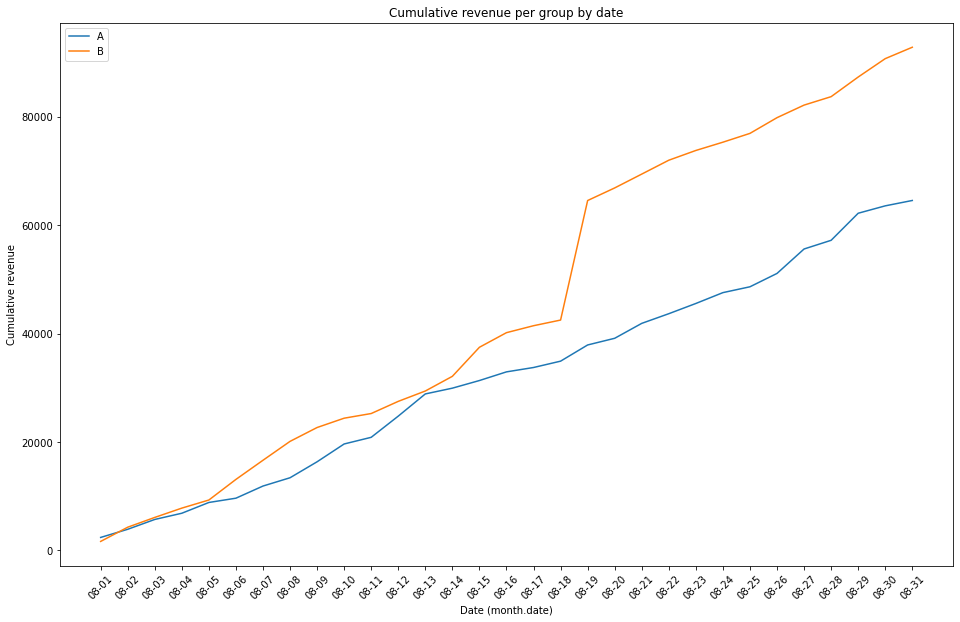

In [25]:
# plot a graph
cumulativeRevenueA = cumulativeRevenue[cumulativeRevenue['group'] == 'A'][['date','revenue','transactionId']]
cumulativeRevenueB = cumulativeRevenue[cumulativeRevenue['group'] == 'B'][['date','revenue', 'transactionId']]
plt.rcParams["figure.figsize"] = (16,10)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'B')
plt.legend()
plt.title("Cumulative revenue per group by date")
plt.ylabel("Cumulative revenue")
plt.xlabel("Date (month.date)")
plt.xticks(rotation=45);

So, we see an upward trend in revenue for both Group A and Group B. At first glance, group B looks much better\
!BUT\
The slope of both curves looks the same, and the sharp increase took place in group B on August 19th. We have already seen this date when we previously looked at the extremes in revenue.\
So, if we replace this outlier with the average value for the day - I do not see a significant difference between the groups.

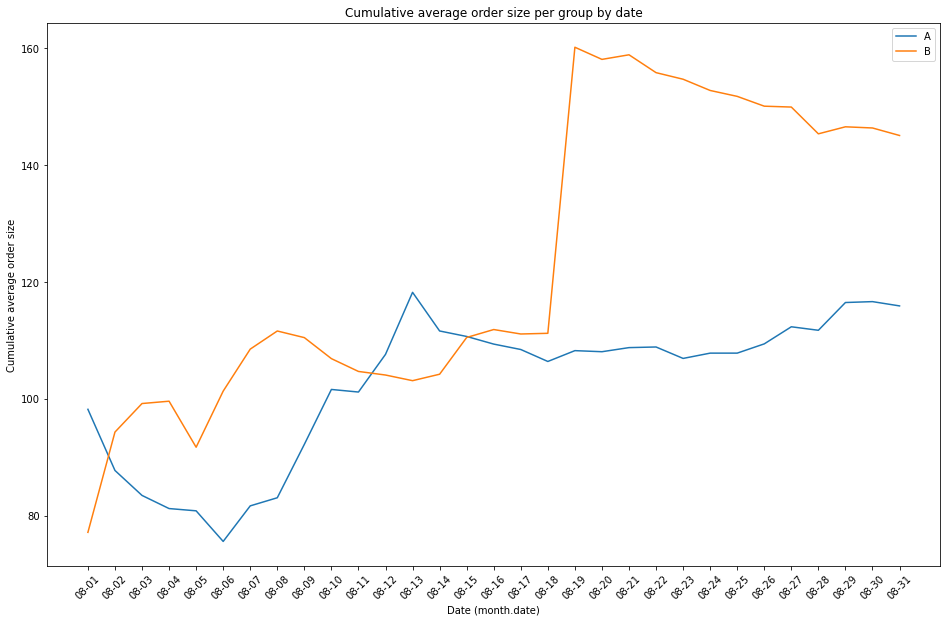

In [26]:
# let's count and draw the average revenue per groups
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['transactionId'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['transactionId'], label='B')
plt.legend() 
plt.title("Cumulative average order size per group by date")
plt.ylabel("Cumulative average order size")
plt.xlabel("Date (month.date)")
plt.xticks(rotation=45);

After large fluctuations at the beginning of the month, the curves of both groups calm down towards the end. This means that it is already possible to conduct tests and obtain adequate results.\
As we can see, at the beginning, the average cumulative revenue in group A fell but then grew up and quietly goes in the range from 100 to 120.\
Group B reduces its average cumulative revenue towards the end of the month, but this is normal, after the "outlier" on August 19th. I guess if we continued the test, curve B would also descend to the range of group A.

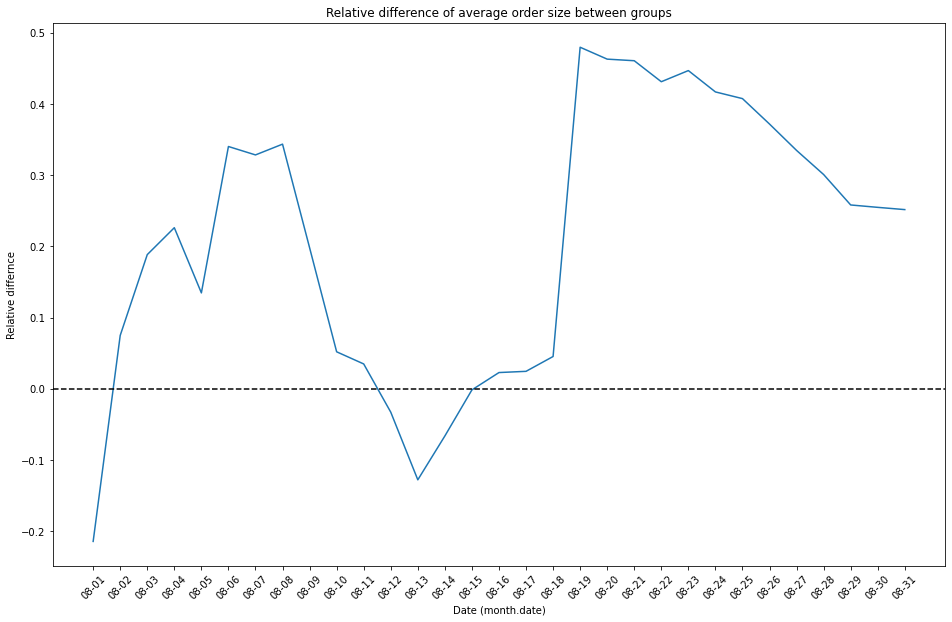

In [27]:
# let's count and draw the relative difference between average revenue per groups
mergedCumulativeRevenue = pd.merge(cumulativeRevenueA,cumulativeRevenueB,left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A','B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['transactionIdB']) / (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['transactionIdA']) -1)
plt.axhline(y = 0,color = 'black', linestyle = '--')
plt.title("Relative difference of average order size between groups")
plt.xlabel("Date (month.date)")
plt.ylabel("Relative differnce")
plt.xticks(rotation=45);

In general, the schedule did not surprise. We see two peaks, and the second one is caused by the same "outlier". In the future, when conducting tests, it should be removed.

## Conversion rate

Now lets find how many orders occured on each day for each group:

In [28]:
# let's count conversion
conversion_day = correct_orders.groupby(['date','group'], as_index = False).agg({'transactionId': 'count'})
conversion_day.columns = ['date','group','n_orders']
conversion_day = pd.merge(conversion_day,visits, left_on = ['date','group'], right_on = ['date','group'])
# formated the date
conversion_day.date = conversion_day.date.dt.strftime('%m-%d')

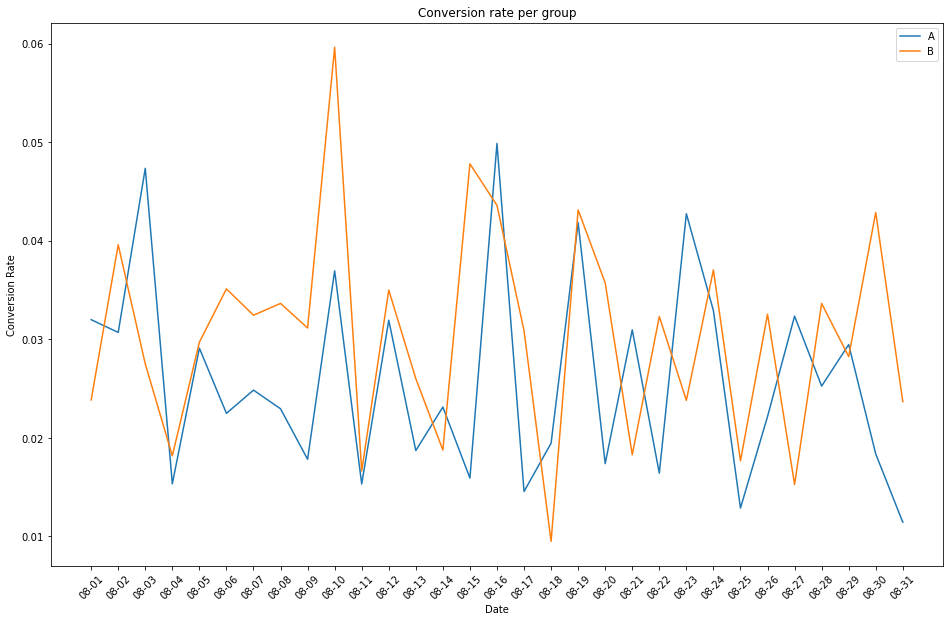

In [29]:
# make the plot
conversion_day['conversion'] = conversion_day.n_orders / conversion_day.visits
conversion_A = conversion_day[conversion_day['group'] == 'A'][['date','conversion']]
conversion_B = conversion_day[conversion_day['group'] == 'B'][['date','conversion']]
plt.plot(conversion_A.date, conversion_A.conversion, label = 'A')
plt.plot(conversion_B.date, conversion_B.conversion, label = 'B')
plt.legend()
plt.title("Conversion rate per group")
plt.xlabel("Date")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45);

In general, we see that the group B curve is higher than the group A curve. This indicates that the conversion in group B is better.

Let's look at the cumulative conversion data by groups.

In [30]:
# calculating cumulative visits
cumulativeVisits = (
    datesgroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]
    .agg({'date': 'max', 'group': 'max', 'visits': 'sum'}), axis=1).sort_values(by = ['date','group'])
)
cumulativeVisits.date = cumulativeVisits.date.dt.strftime('%m-%d')

In [31]:
# calculating cumulative conversion
cumulativeConversion = pd.merge(cumulativeRevenue,cumulativeVisits, right_on = ['date','group'], left_on = ['date','group'])
cumulativeConversion['conversion'] = cumulativeConversion.visitorId / cumulativeConversion.visits

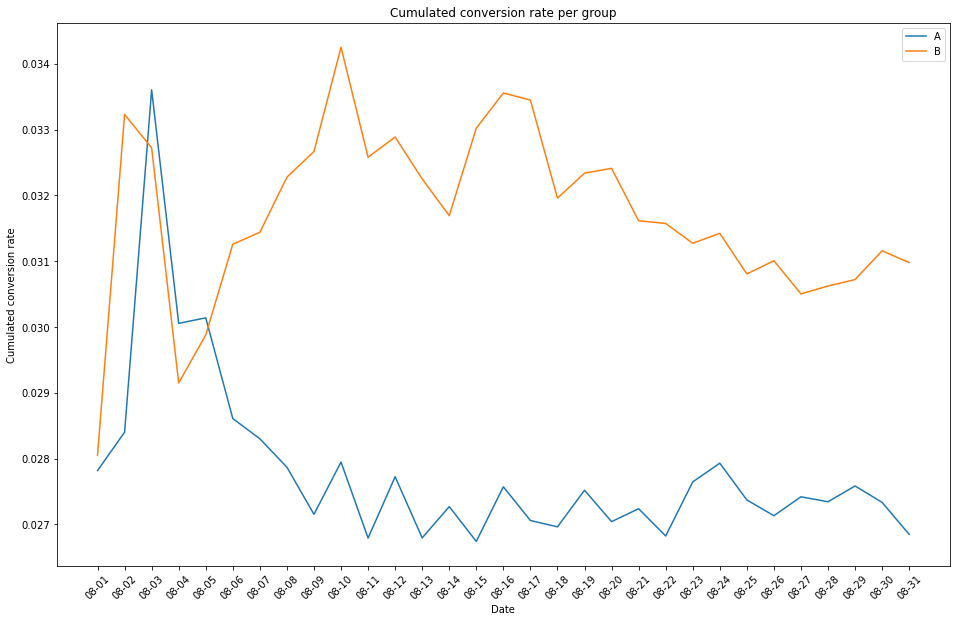

In [32]:
# make the plot
cumulativeConversion_A = cumulativeConversion[cumulativeConversion.group == 'A'][['date','conversion']]
cumulativeConversion_B = cumulativeConversion[cumulativeConversion.group == 'B'][['date','conversion']]
plt.plot(cumulativeConversion_A.date, cumulativeConversion_A.conversion, label = 'A')
plt.plot(cumulativeConversion_B.date, cumulativeConversion_B.conversion, label = 'B')
plt.legend()
plt.title("Cumulated conversion rate per group")
plt.xlabel("Date")
plt.ylabel("Cumulated conversion rate")
plt.xticks(rotation=45);

Wow.
Definitely, group B has a higher cumulative conversion rate than group A.

## Anomalies


At first, we will find the number of orders per user. It will help us detect anomalies.

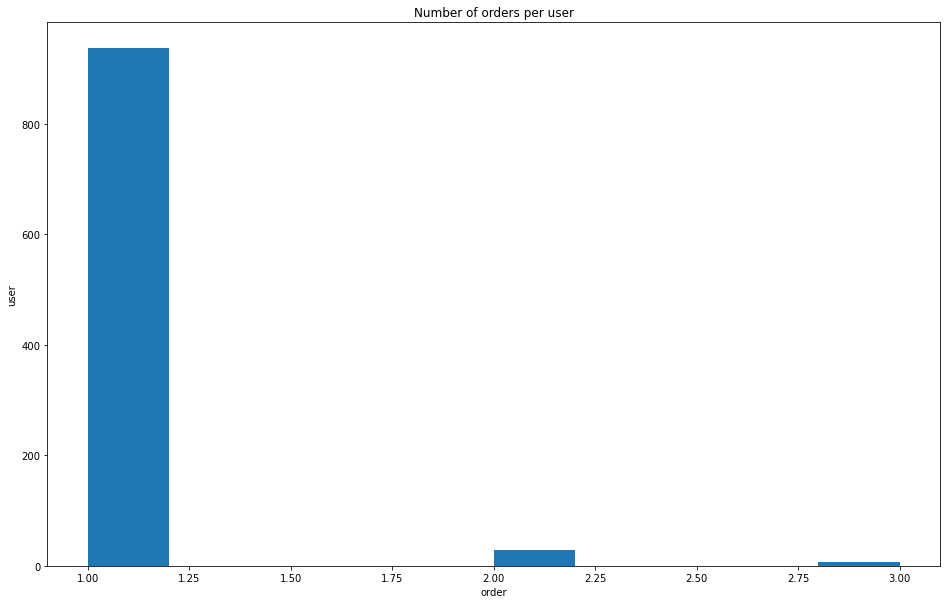

In [33]:
# let's count the number of orders
orders_per_user = correct_orders.groupby('visitorId', as_index = False).agg({'transactionId': 'count'})
orders_per_user.columns = ['visitorId', 'number_of_orders']

# make the histo-plot
plt.hist(orders_per_user.number_of_orders)
plt.title("Number of orders per user")
plt.xlabel('order')
plt.ylabel('user');



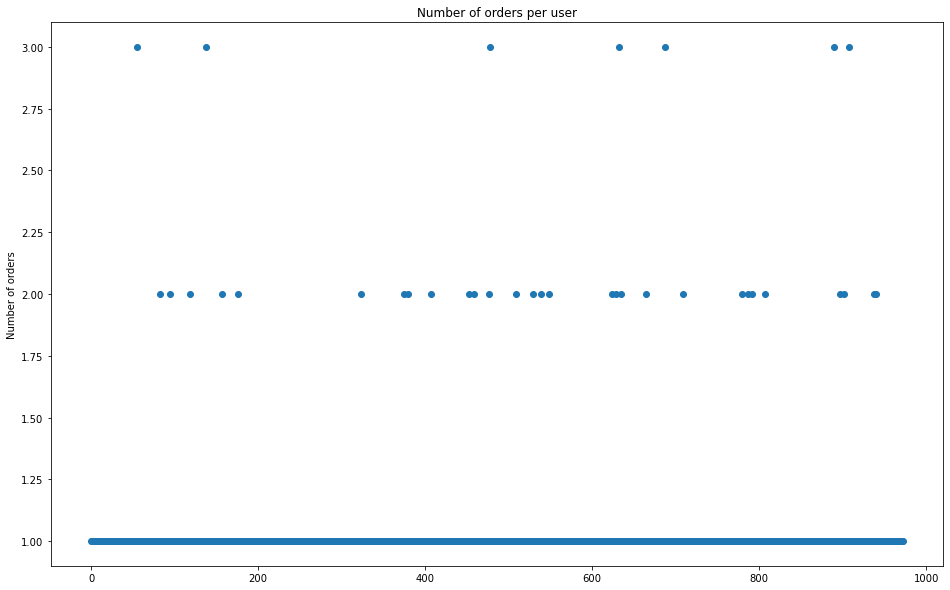

In [34]:
# make the scatter-plot
x_values = pd.Series(range(0, len(orders_per_user.number_of_orders)))
plt.scatter(x_values, orders_per_user.number_of_orders)
plt.title("Number of orders per user")
plt.ylabel("Number of orders");

So, according to the charts, we see that the majority of customers made no more than 1 order.\
We see that there are customers who have made 2, and sometimes 3 orders. But they are few.

In [35]:
#let's also count the percentile
np.percentile(orders_per_user.number_of_orders,[90, 95,99])

array([1., 1., 2.])

Percentiles showed that at least 95% of customers made no more than 1 order.\
I propose this number and take it as the base.

Now let's see how the **revenue** is distributed. As we remember, we have a large outlier around 20K. Let's see how lonely he is.

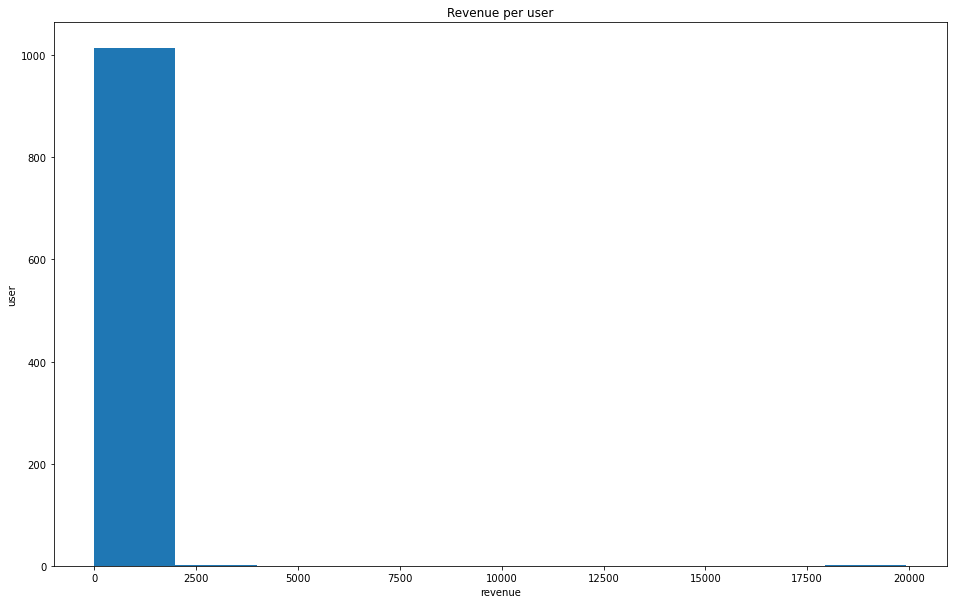

In [36]:
plt.hist(correct_orders.revenue)
plt.title("Revenue per user")
plt.xlabel('revenue')
plt.ylabel('user');

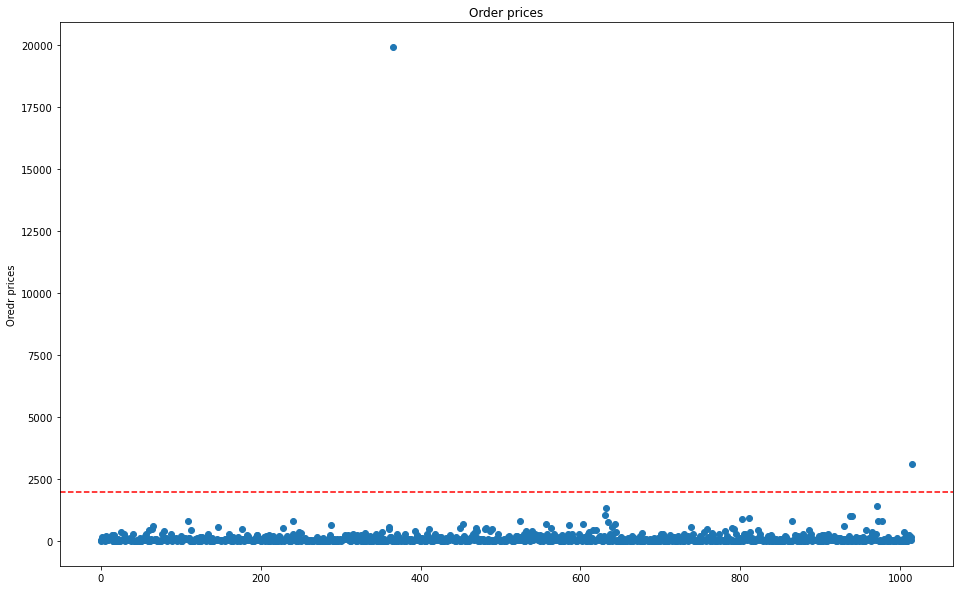

In [37]:
x_values = pd.Series(range(0,len(correct_orders.revenue)))
plt.scatter(x_values,correct_orders.revenue)
plt.title("Order prices")
plt.ylabel("Oredr prices")
plt.axhline(y = 2000, color = 'r', linestyle = '--');

So, in both graphs, we see that beyond 2000.00 we have only two outliers. Although 2000.00 is also a high bar, I took it so that the breakdown on the scatter chart corresponded to the histogram.\
Now let's look at the percentiles to see where the 90%, 95%, and 99% of the data actually lies.

In [38]:
correct_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [39]:
np.percentile(correct_orders.revenue,[90, 95,99])

array([280.8  , 414.275, 830.3  ])

We see that only 10% of the data have revenue above 280.8, 5% have revenue of towers 414.275, and 1% above 830.30 (they didn’t even reach 1000).\
In the future, to work with filtered data in tests, we will use the number 414.275 as a cutoff point.

## Statistical significance of the difference in conversion between the groups


Let's formulate our null hypothesis as follows: Conversion rates of Group A and Group B are the same.\
I will set the threshold value to the standard 0.05, I see no reason to set it to less. Then:

H0: Conversion rates of Group A and Group B are the same.

H1: Conversion rates of Group A and Group B are different.

Threshold = 0.05

In [40]:
# set the alpha
alpha = 0.05

# make samples
OrderByuserA = correct_orders[correct_orders.group == 'A'].groupby('visitorId', as_index = False).agg(
    {'transactionId': pd.Series.nunique})
OrderByuserA.columns = ['visitorId', 'orders']
OrderByuserB = correct_orders[correct_orders.group == 'B'].groupby('visitorId', as_index = False).agg(
    {'transactionId': pd.Series.nunique})
OrderByuserB.columns = ['visitorId', 'orders']

SampleA = pd.concat([OrderByuserA.orders,pd.Series(0, index = np.arange(
    visits[visits.group == 'A']['visits'].sum() - len(OrderByuserA.orders)),name = 'orders')],axis = 0)
SampleB = pd.concat([OrderByuserB.orders,pd.Series(0, index = np.arange(
    visits[visits.group == 'B']['visits'].sum() - len(OrderByuserA.orders)),name = 'orders')],axis = 0)


print(f'Average different: {SampleB.mean()/SampleA.mean()-1}')

result = st.mannwhitneyu(SampleA, SampleB)[1]
print(f'p-value: {result}')

if (result < alpha):
    print('We reject the null hypothesis.')
else:
    print("We can't reject the null hypothesis.")


Average different: 0.1547310407250404
p-value: 0.00670090784437845
We reject the null hypothesis.


So, we see that the p-value is less than 0.05, so we reject the null hypothesis that the conversion rate of Group A and Group B are the same.\
The Group B conversion rate average is 15.47% higher, which the average difference showed us.

## Statistical significance of the difference in average order size between the groups

Let's formulate our null hypothesis as follows: Average order size of Group A and Group B are the same.
I will set the threshold value to the standard 0.05, I see no reason to set it to less. Then:

H0:  Average order sizes of Group A and Group B are the same.

H1:  Average order sizes of Group A and Group B are different.

Threshold = 0.05


In [41]:
# count significance of different 
average_different_of_revenue = correct_orders[correct_orders.group == 'B']['revenue'].mean() \
                        / correct_orders[correct_orders.group == 'A']['revenue'].mean() - 1
print(f'Average different: {average_different_of_revenue}')

#let's test
results = st.mannwhitneyu(correct_orders[correct_orders.group == 'A']['revenue'], \
                          correct_orders[correct_orders.group == 'B']['revenue'])[1]

print(f'p-value: {results}')

if (results < alpha):
    print('We reject the null hypothesis.')
else:
    print("We can't reject the null hypothesis.")


Average different: 0.2783448769307848
p-value: 0.4311164845007834
We can't reject the null hypothesis.


So we see that the p-value is significantly greater than 0.05, so we CANNOT reject the null hypothesis that Group A and Group B have the same order size.\
Group B's average revenue is up 27.83%, although it's likely that there were some emissions involved.

So we will continue to conduct tests, only with data without extreme values.

## Statistical significance of the difference in conversion between the groups without anomalies

I'm repeating my previous conditions for the testing difference in conversion rate: Group A and Group B conversion rates are the same. But this time I'll use filtered data.\
I will set the threshold value to the standard 0.05. 

Then:

H0: Conversion rates of Group A and Group B are the same.

H1: Conversion rates of Group A and Group B are different.

Threshold = 0.05

In [42]:
# at first, let's make a list of the abnormal users

usersManyOrder = pd.concat([OrderByuserA[OrderByuserA.orders >1]['visitorId'],
                           OrderByuserB[OrderByuserB.orders >1]['visitorId']], axis = 0)

usersBigOrder = correct_orders[correct_orders.revenue > 414.275]['visitorId']
abnormalUsers = pd.concat([usersManyOrder, usersBigOrder], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head())
print(abnormalUsers.shape)

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64
(86,)


In [43]:
# let's make a new samples

SampleAFiltered = pd.concat([OrderByuserA[np.logical_not(OrderByuserA['visitorId'].isin(abnormalUsers))]['orders'],\
                             pd.Series(0, index = np.arange(visits[visits['group'] == 'A']['visits'].sum()\
                                                            - len(OrderByuserA['orders'])),name = 'orders')],axis = 0)
SampleBFiltered = pd.concat([OrderByuserB[np.logical_not(OrderByuserB['visitorId'].isin(abnormalUsers))]['orders'],\
                             pd.Series(0, index = np.arange(visits[visits['group'] == 'B']['visits'].sum()\
                                                            - len(OrderByuserB['orders'])),name = 'orders')],axis = 0)


In [44]:
print(f'Average different: {SampleBFiltered.mean()/SampleAFiltered.mean()-1}')

result = st.mannwhitneyu(SampleAFiltered, SampleBFiltered)[1]
print(f'p-value: {result}')

if (result < alpha):
    print('We reject the null hypothesis.')
else:
    print("We can't reject the null hypothesis.")

Average different: 0.17392968945597698
p-value: 0.00796510358286988
We reject the null hypothesis.


The first thing to say is that we found 86 transactions that fall under our definition of abnormal: more than 1 order per user or order value above 414.275

The test itself again showed a p-value less than alpha, so we again reject the null hypothesis.\
Even in the filtered database, the correlation index for samples from groups A and B is different.\
The difference between the average values of the conversion index even increased and reached 17.39%.

## Statistical significance of the difference in average order size between the groups without anomalies


Againe repeating my previous conditions for the testing difference in order size: Average order size of Group A and Group B are the same. I will set the threshold value to the standard 0.05. Then:

H0: Average order sizes of Group A and Group B are the same.

H1: Average order sizes of Group A and Group B are different.

Threshold = 0.05

In [45]:
average_different_of_revenue = correct_orders[np.logical_and(
    correct_orders.group == 'B',
        np.logical_not(correct_orders.visitorId.isin(abnormalUsers)))]['revenue'].mean()/\
    correct_orders[np.logical_and(
        correct_orders.group == 'A',
        np.logical_not(correct_orders.visitorId.isin(abnormalUsers)))]['revenue'].mean() - 1

print(f'Average different: {average_different_of_revenue}')

results = st.mannwhitneyu(
    correct_orders[np.logical_and(
        correct_orders.group == 'B',
        np.logical_not(correct_orders.visitorId.isin(abnormalUsers)))]['revenue'],
    correct_orders[np.logical_and(
        correct_orders.group == 'A',np.logical_not(correct_orders.visitorId.isin(abnormalUsers)))]['revenue'])[1]

print(f'p-value: {results}')

if (results < alpha):
    print('We reject the null hypothesis.')
else:
    print("We can't reject the null hypothesis.")

Average different: -0.03329650261005468
p-value: 0.3855938654997413
We can't reject the null hypothesis.


And this test did not change the situation. The p-value has shrunk a bit but is still significantly larger than the alpha value. Therefore - we cannot reject the null hypothesis, and the revenue of different groups is similar.\
But the difference in average values has changed significantly: from 27.83% to -3.33%. That is, with filtered data, the average revenue of Group A is even greater than that of Group B.

### Conclusion

So, during the project, we did:
- prioritized hypotheses
- studied   cumulative revenue, average order size, and the relative difference in cumulative average order size for groups
- studied  conversion rate
- studied anomalies
- found the significance statistical difference in conversion between the groups with and without anomalies
- found the significance statistical difference in average order size between the groups with and without anomalies

Data analysis showed:
- that anomalies are users with an order quantity greater than 1, or with an order size greater than 414.275.
- tests of samples with and without anomalies - did not fundamentally change the results.
- the conversion index of group B and group A is different. It is significantly higher in Group B, and the difference between the average values increased from 15.47% to 17.39%.
- order size for Group I and Group A is the same. According to the results of the test without anomalies, the order size is more prominent for Group A, although not significant (only 3.33%)

Conclusion
- the graphs show that the model has largely stabilized.
- Group B showed the best results. Yes, without anomalies, the average revenue is slightly lower than group A's. But the test did not show significant statistical differences in this indicator. But on the conversion index, the test showed a significant statistical difference.

Recommendations
- I strongly recommend stopping the test and recognizing Group B as the winner.